# Phase change materials



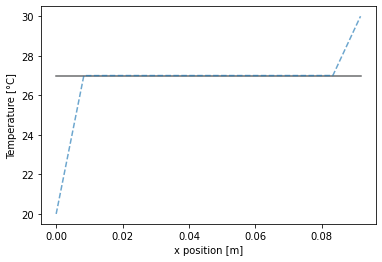

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from tools.plot_tools import colors
from code_PCM import fc_fraction, fc_distrib, fc_Cp_apparent

## Constants definition


In [2]:
# Cps in J/kg/K
Cp_s=1800
Cp_l=2400
Lf=188000 # Lf
dTf=0.01
Tmin=20
Tmax=30
Tf=27
T_init=Tf

# material props
L=0.1# m
k=0.9
rho=800


In [3]:

# domain properties and initial conditions
n=10+2 # Matrix dimension
K=np.eye(n,n,k=-1)*1 + np.eye(n,n)*-2 + np.eye(n,n,k=1)*1
K[0,0]=0
K[0,1]=0
K[-1,-1]=0
K[-1,-2]=0

dx=L/n #


print("Matrix K \n {}".format(K))

 

Matrix K 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [4]:
#intialize the local Fourier number for PCMs
def generate_Fo(dt=5):
    Fo=np.zeros(n)
    for i in range(len(Fo)):
        Fo[i]=k*dt/(rho*fc_Cp_apparent(T_init,dTf,Tf,Lf,Cp_s,Cp_l)*dx**2)
        # local stability check
        if Fo[i]>0.5:
            print("stability issue... i=",i)
            dt_min=0.5*dx**2*rho*Cp_s/k
            print("minimum time step =", round(dt_min,2))
            dt=0.9*dt_min
            print("changing to =", round(dt,2))
#     print("Fo sequence  \n {}".format(Fo))
    return Fo



In [5]:
# time
def compute_and_plot_PCM(T_init, hours, dt=5 ):
    
    T_plus,Cp_t=np.zeros(n),np.zeros(n)
    T=np.ones(n)*T_init # initialize at Tmin
    # simulation time and time step
    t=0
    sim_time=hours*3600 #s
    
    Fo = generate_Fo()
    while t < sim_time:
        # boundary conditions
        T[0]=Tmin
    #T[n-1]=Tmin+(Tmax-Tmin)*t/sim_time
        T[n-1]=Tmax
        # inside the domain
        T_plus=Fo*np.dot(K,T) +T
        # update the local apparent Cp
        for i in range(n):
            Cp_t[i] = fc_Cp_apparent(T_plus[i],dTf,Tf,Lf,Cp_s,Cp_l)
        Fo=k*dt/(rho*Cp_t*dx**2)
        if len(np.argwhere(Fo > 0.5))>0 :
            indice=np.argwhere(Fo > 0.5)
            print("stability issue during simulation... Fo =", Fo[indice[0]])
            print("occurred for... t=", round(t,1), " / i=")
        t+=dt #time increment
        T=T_plus # T turns into T_plus to allow the calculation of the next T_plus
    
    x_pos=np.arange(0,L,dx)
    plt.plot(x_pos, np.ones(n)*Tf,color=colors[-1],linestyle="-",alpha=0.9,marker='')
    plt.xlabel("x position [m]")
    plt.ylabel("Temperature [°C]")
    plt.plot(x_pos, T_plus, alpha=0.65, linestyle="--",marker='')



In [9]:
%matplotlib inline
interact(compute_and_plot_PCM, T_init = widgets.FloatSlider(value=7.5,    min=1,
                                               max=50.0,
                                               step=1),
hours = widgets.FloatSlider(value=7.5,
                                               min=1,
                                               max=5.0,
                                               step=0.5),
        dt = widgets.IntSlider(value=7.5,
                                               min=1,
                                               max=5.0))


interactive(children=(FloatSlider(value=7.5, description='T_init', max=50.0, min=1.0, step=1.0), FloatSlider(v…

<function __main__.compute_and_plot_PCM(T_init, hours, dt=5)>